In [1]:
# Defining the Required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve



# EXPLORATORY DATA ANALYSIS
## Data Understanding, Cleaning and Preparation

In [2]:
# Load the data
data = pd.read_csv('Leads.csv')

### Initial data overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
data.shape

(9240, 37)

In [7]:
# Detailed analysis of missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display only rows where there are missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

                                               Missing Values  Percentage
Lead Source                                                36    0.389610
TotalVisits                                               137    1.482684
Page Views Per Visit                                      137    1.482684
Last Activity                                             103    1.114719
Country                                                  2461   26.634199
Specialization                                           1438   15.562771
How did you hear about X Education                       2207   23.885281
What is your current occupation                          2690   29.112554
What matters most to you in choosing a course            2709   29.318182
Tags                                                     3353   36.287879
Lead Quality                                             4767   51.590909
Lead Profile                                             2709   29.318182
City                                  

In [8]:
# Identify categorical variables with 'Select' as a placeholder for missing data
select_as_missing = (data == 'Select').sum()
print("Count of 'Select' as placeholder:\n", select_as_missing)

Count of 'Select' as placeholder:
 Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                       

In [9]:
# Select and Missing data

select_missing_data = select_as_missing+missing_values
select_missing_per = (select_missing_data/ len(data)) * 100
# Combine into a DataFrame
Select_missing_data = pd.DataFrame({
    'Sel & Miss Values': select_missing_data,
    'Percentage': select_missing_per
})

# Display only rows where there are missing values
Select_missing_data = Select_missing_data[Select_missing_data['Sel & Miss Values'] > 0]
print(Select_missing_data.sort_values('Percentage'))

                                               Sel & Miss Values  Percentage
Lead Source                                                   36    0.389610
Last Activity                                                103    1.114719
TotalVisits                                                  137    1.482684
Page Views Per Visit                                         137    1.482684
Country                                                     2461   26.634199
What is your current occupation                             2690   29.112554
What matters most to you in choosing a course               2709   29.318182
Tags                                                        3353   36.287879
Specialization                                              3380   36.580087
City                                                        3669   39.707792
Asymmetrique Activity Score                                 4218   45.649351
Asymmetrique Activity Index                                 4218   45.649351

In [10]:
# Load the data dictionary
data_dict = pd.read_excel('Leads Data Dictionary.xlsx', header=2, usecols='B:C')

In [11]:
data_dict.head(40)

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...
5,Do Not Call,An indicator variable selected by the customer...
6,Converted,The target variable. Indicates whether a lead ...
7,TotalVisits,The total number of visits made by the custome...
8,Total Time Spent on Website,The total time spent by the customer on the we...
9,Page Views Per Visit,Average number of pages on the website viewed ...


## Handling Missing Data

#### The following columns have a high number of missing or select place holder infomation
    Field                                                        | Missing/Select Values | Percentage Missing
    1. Tags                                                      | 3353                  | 36.287879
    2. Specialization                                            | 3380                  | 36.580087
    3. City                                                      | 3669                  | 39.707792
    4. Asymmetrique Activity Score                               | 4218                  | 45.649351
    5. Asymmetrique Activity Index                               | 4218                  | 45.649351
    6. Asymmetrique Profile Index                                | 4218                  | 45.649351
    7. Asymmetrique Profile Score                                | 4218                  | 45.649351
    8. Lead Quality                                              | 4767                  | 51.590909
    9. Lead Profile                                              | 6855                  | 74.188312
    10. How did you hear about X Education                       | 7250                  | 78.463203

##### Dropping the column with very high missing values (>40%)


In [12]:
data.drop(['How did you hear about X Education'], axis=1, inplace=True)

In [13]:
data.drop(['Lead Profile'], axis=1, inplace=True)

In [14]:
data.drop(['Lead Quality'], axis=1, inplace=True)

In [15]:
data.drop(['Asymmetrique Profile Score'], axis=1, inplace=True)

In [16]:
data.drop(['Asymmetrique Profile Index'], axis=1, inplace=True)

In [17]:
data.drop(['Asymmetrique Activity Index'], axis=1, inplace=True)

In [18]:
data.drop(['Asymmetrique Activity Score'], axis=1, inplace=True)

In [19]:
# Reassessing the shape of the data set
data.shape

(9240, 30)

##### Missing data handling
The following still consists of missing information up to 39%

    0. Field                                                      Sel & Miss Values  Percentage
    1. Lead Source                                                  36                0.389610
    2. Last Activity                                               103                1.114719
    4. TotalVisits                                                 137                1.482684
    5. Page Views Per Visit                                        137                1.482684
    6. Country                                                    2461               26.634199
    7. What is your current occupation                            2690               29.112554
    8. What matters most to you in choosing a course              2709               29.318182
    9. Tags                                                       3353               36.287879
    10. Specialization                                            3380               36.580087
    11. City                                                      3669               39.707792

This is a lot of information and removing the respective columns or rows cannot be determined at this time. 
To better handle this, all "NA" and "Select" value will ne replaced with "Not Provided" to make it easy to 
identify during data analysis and handle in case of exception

In [20]:
# Replace missing values and 'Select' with 'Not Provided' for object type columns
columns_with_missing_data = [
    'Lead Source', 'Last Activity',  
    'Country', 'What is your current occupation', 'What matters most to you in choosing a course',
    'Tags', 'Specialization', 'City'
]

for column in columns_with_missing_data:
    data[column] = data[column].fillna('Not Provided').replace('Select', 'Not Provided')
    


In [21]:
#REpalce missing values in numerical columns 'TotalVisits','Page Views Per Visit' with median values
# Calculate medians
total_visits_median = data['TotalVisits'].median()
page_views_per_visit_median = data['Page Views Per Visit'].median()

# Replace missing values with medians
data['TotalVisits'].fillna(value=total_visits_median)
data['Page Views Per Visit'].fillna(value=page_views_per_visit_median)

0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9240, dtype: float64

In [22]:
data.shape

(9240, 30)

In [23]:
# Check again for select / missing data
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

select_as_missing = (data == 'Select').sum()

select_missing_data = select_as_missing+missing_values
select_missing_per = (select_missing_data/ len(data)) * 100
# Combine into a DataFrame
Select_missing_data = pd.DataFrame({
    'Sel & Miss Values': select_missing_data,
    'Percentage': select_missing_per
})

# Display only rows where there are missing values
Select_missing_data = Select_missing_data[Select_missing_data['Sel & Miss Values'] > 0]
print(Select_missing_data.sort_values('Percentage'))

                      Sel & Miss Values  Percentage
TotalVisits                         137    1.482684
Page Views Per Visit                137    1.482684


### Univariate Analysis

In [24]:
# Identify numerical and categorical columns based on their data type
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in ['Lead Number', 'Converted']]
categorical_cols = [col for col in data.columns if (data[col].dtype == 'object' and col != 'Converted' and col != 'Prospect ID')]
## Removing Lead Number and Prospect ID from the univariate analysis. 
## Added converted (boolean) field to categorical columns

C:\Users\Umang Malhotra\AppData\Local\Temp\ipykernel_17060\918051885.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=False)


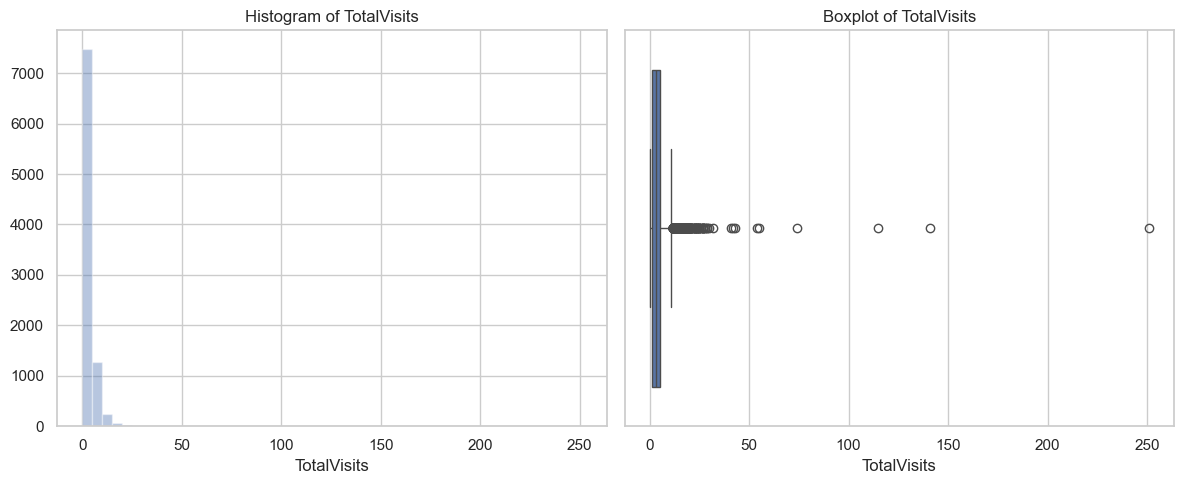

C:\Users\Umang Malhotra\AppData\Local\Temp\ipykernel_17060\918051885.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=False)


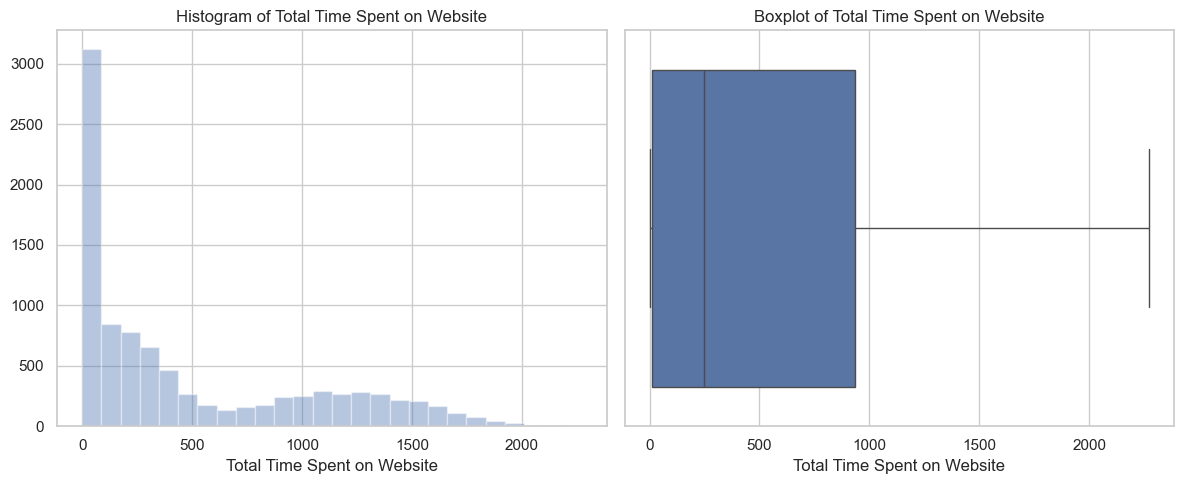

C:\Users\Umang Malhotra\AppData\Local\Temp\ipykernel_17060\918051885.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=False)


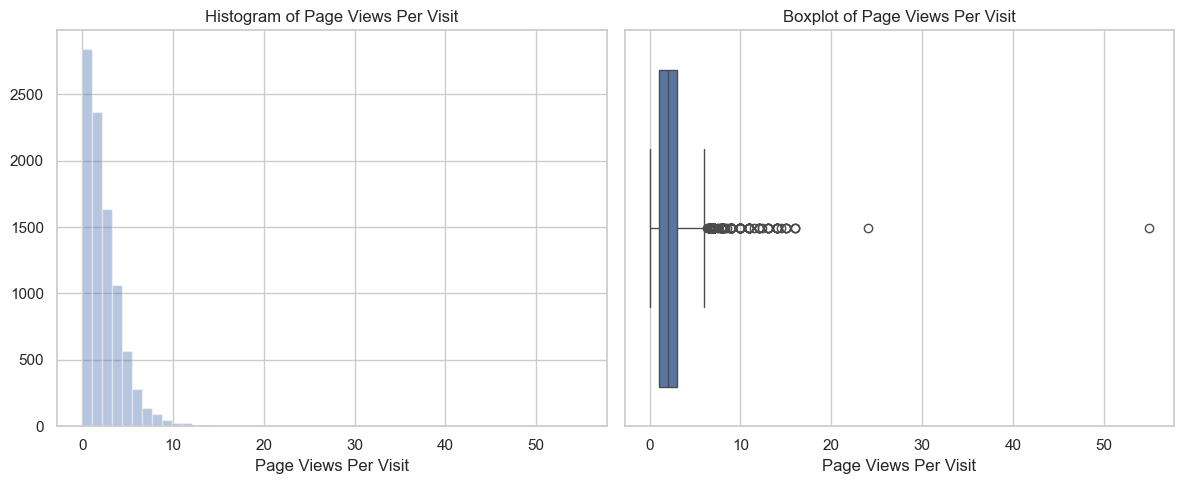

In [25]:
# Plotting settings
sns.set(style="whitegrid")

# Plot histograms and boxplots for numerical data
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=False)
    # sns.histplot(data[col], kde=False, binwidth=2)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

In [26]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0


###### In case of Total Visists and "Page views per visit", outliers exists
    1. for Total Visit - outlier exists above 150
    2. for Page views per visit - Outlier exists above 20

In [27]:
data = data[data['TotalVisits'] < 150]

In [28]:
data = data[data['Page Views Per Visit'] < 20]

##### Redoing the numerical plot

C:\Users\Umang Malhotra\AppData\Local\Temp\ipykernel_17060\1965542117.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=False)


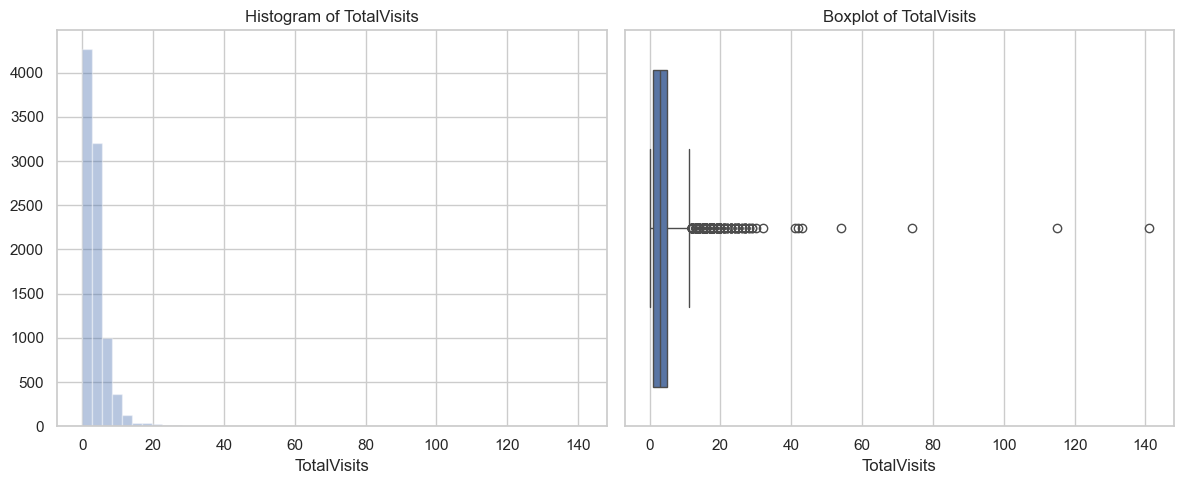

C:\Users\Umang Malhotra\AppData\Local\Temp\ipykernel_17060\1965542117.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=False)


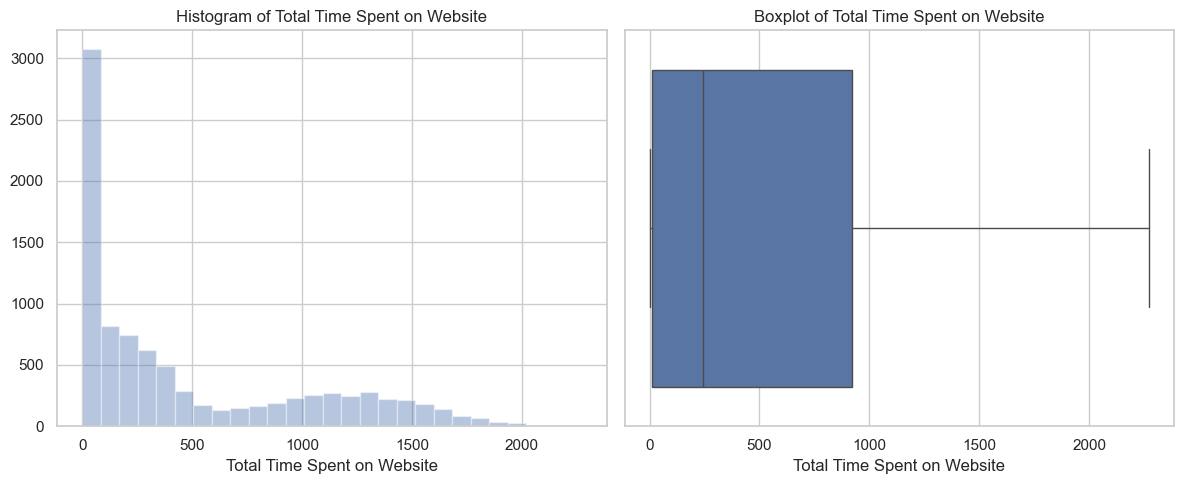

C:\Users\Umang Malhotra\AppData\Local\Temp\ipykernel_17060\1965542117.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=False)


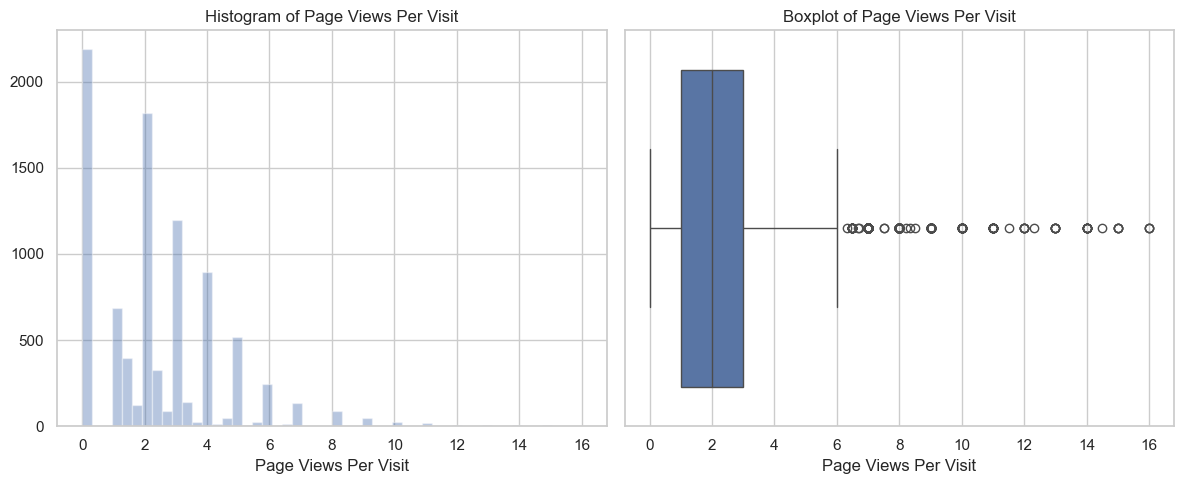

In [29]:

# Plotting settings
sns.set(style="whitegrid")

# Plot histograms and boxplots for numerical data
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=False)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

##### Plotting the Categorical variables

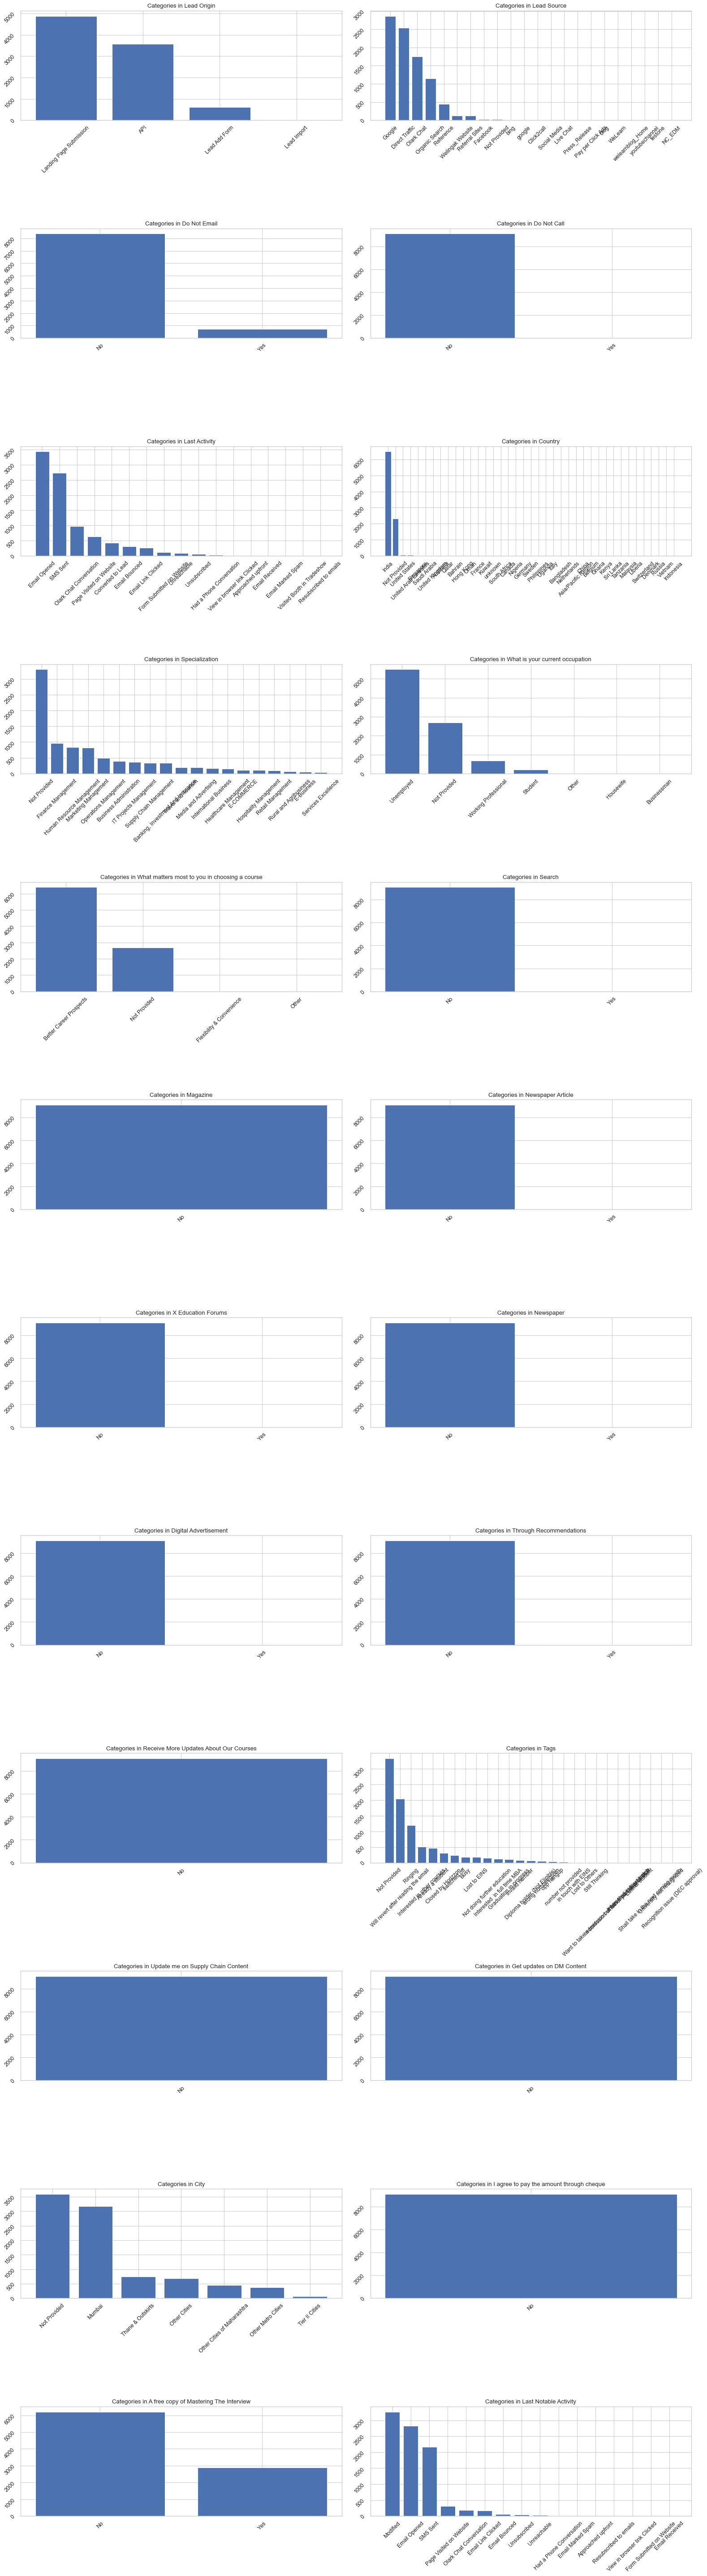

In [30]:
# Calculate the number of rows needed, assuming 2 columns per row
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10 * n_cols, 6 * n_rows),  dpi=80)

# Flatten the axes array for easier iteration if there's more than one row
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Categories in {col}')
    axes[i].tick_params(labelrotation=45)  # Rotate labels for better readability

# Hide any unused axes if the number of plots isn't exactly filling the grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### The following categorical columns may be excluded as they are the same for the entire data set
         
     'Magazine' - Entire data value is "No"     
     'Receive More Updates About Our Courses' - Entire Data set is "No"
     'Update me on Supply Chain Content' - Entire Data set is "No"
     'Get updates on DM Content' - Entire Data set is "No"
     'I agree to pay the amount through cheque' - Entire Data set is "No"

In [31]:
## Verifying the above analysis and removing the columns
# List of specific columns you mentioned to check and remove
columns_to_check = [
    'Magazine', 
    'Receive More Updates About Our Courses', 
    'Update me on Supply Chain Content', 
    'Get updates on DM Content', 
    'I agree to pay the amount through cheque'
]

# Check each column and drop it if it contains only one unique value
for column in columns_to_check:
    if len(data[column].unique()) == 1:
        data.drop(column, axis=1, inplace=True)
        print(f"Column {column} dropped, as it contains only one unique value.")

# Verify the remaining columns in the dataset
print(data.columns)

Column Magazine dropped, as it contains only one unique value.
Column Receive More Updates About Our Courses dropped, as it contains only one unique value.
Column Update me on Supply Chain Content dropped, as it contains only one unique value.
Column Get updates on DM Content dropped, as it contains only one unique value.
Column I agree to pay the amount through cheque dropped, as it contains only one unique value.
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object

In [32]:
#Dropping column Tags that is input by the sales team indicating the current status of Lead. 
# As this could lead to model misinterpretations
data.drop(['Tags'], axis=1, inplace=True)
columns_to_check.append('Tags')

In [33]:

# Update the list of categorical columns

List_cat_cols = [col for col in categorical_cols if col not in columns_to_check]

### Bivatriate analysis with 'converted' column

##### Bivariate analysis for numerical columns

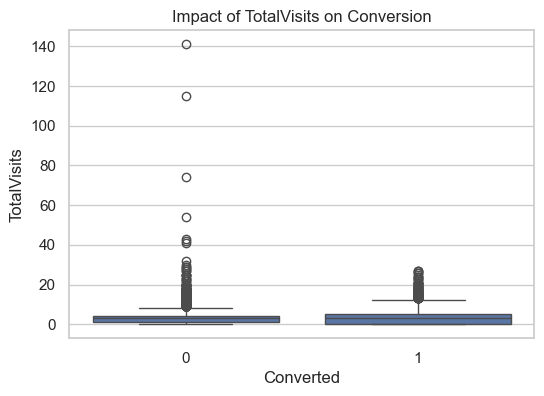

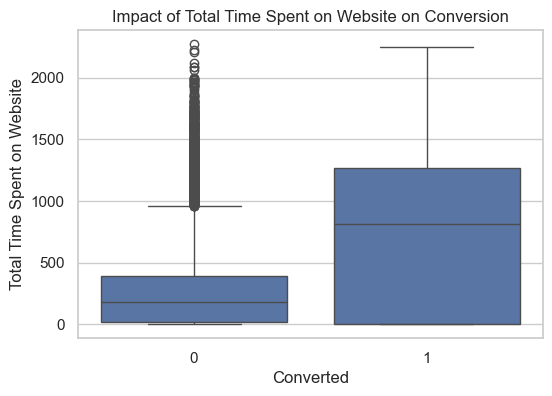

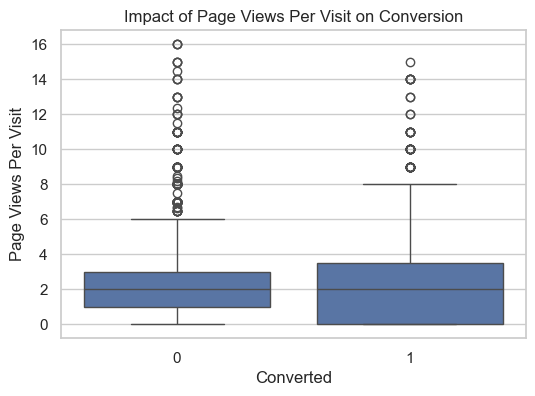

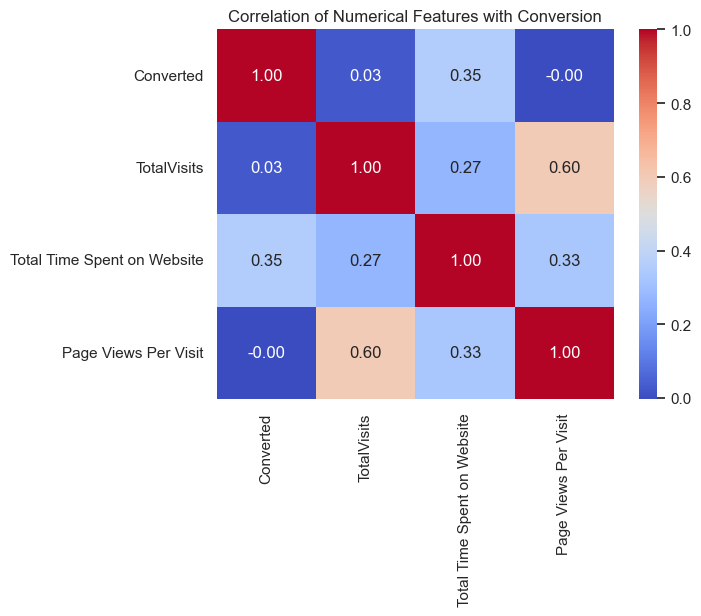

In [34]:
# Box Plots for each numerical variable against 'Converted'
def plot_numerical(numerical_cols, data):
    for col in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Converted', y=col, data=data)
        plt.title(f'Impact of {col} on Conversion')
        plt.show()

    # Correlation Matrix with Heatmap
    correlation = data[['Converted', *numerical_cols]].corr()  # assuming numerical_cols excludes 'Converted'
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation of Numerical Features with Conversion')
    plt.show()
plot_numerical(numerical_cols,data)

##### Bivariate analysis for Categorical columns

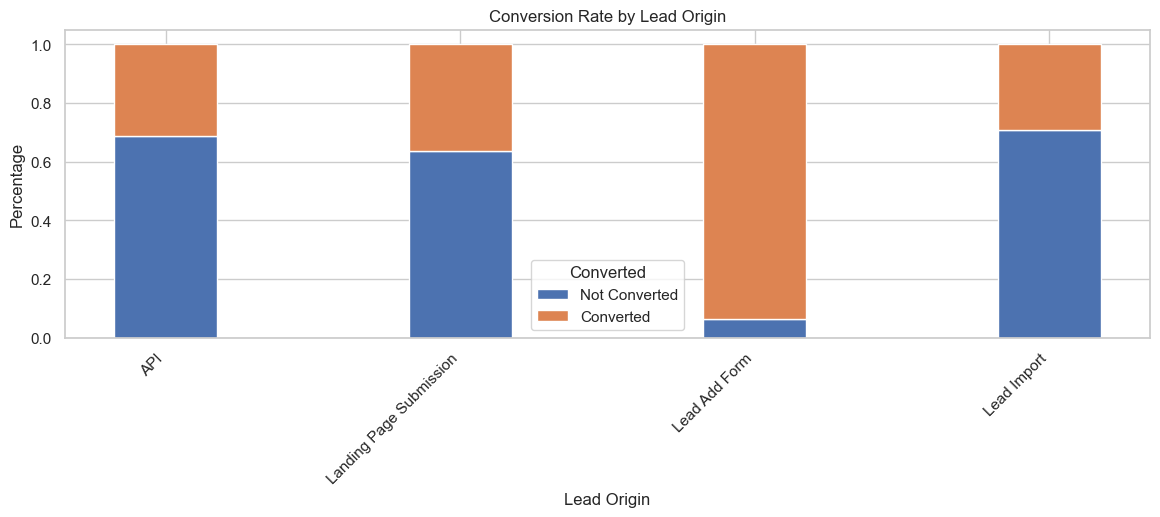

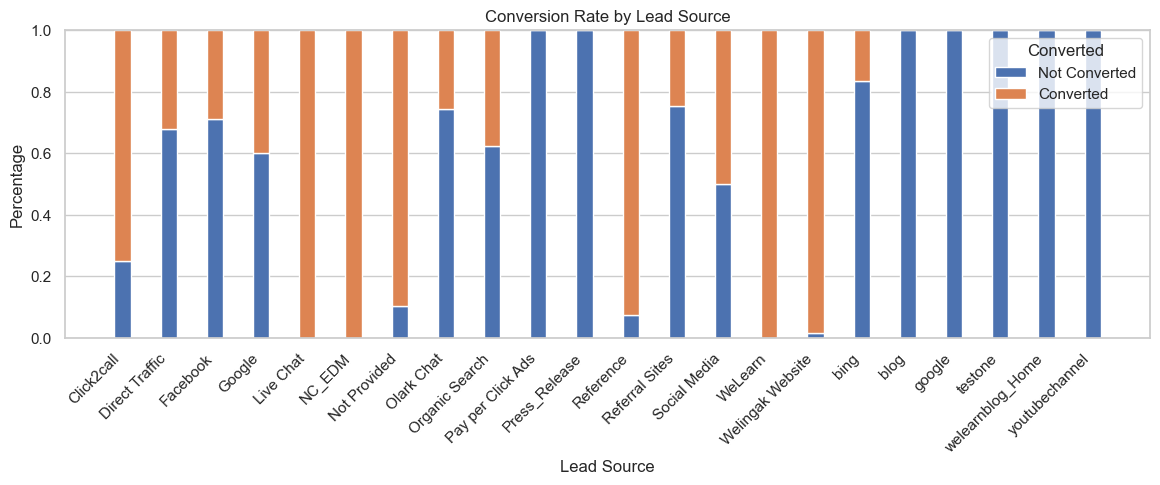

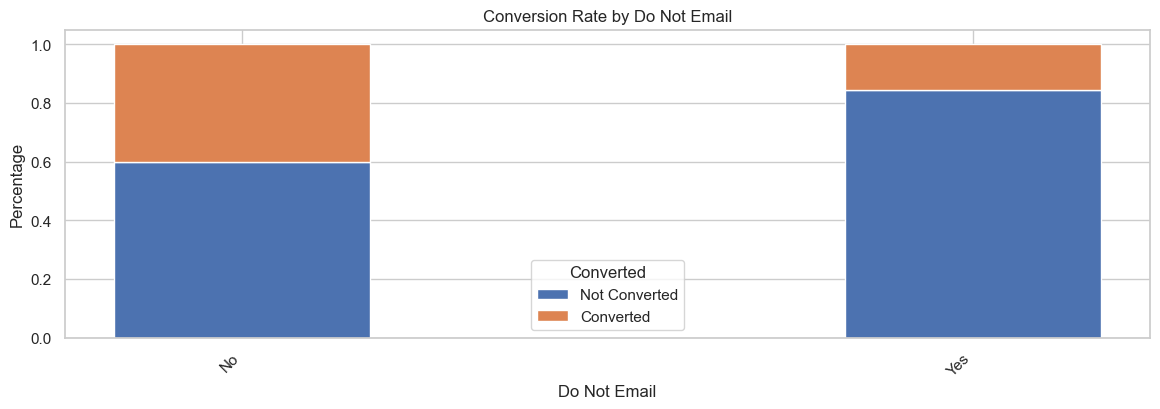

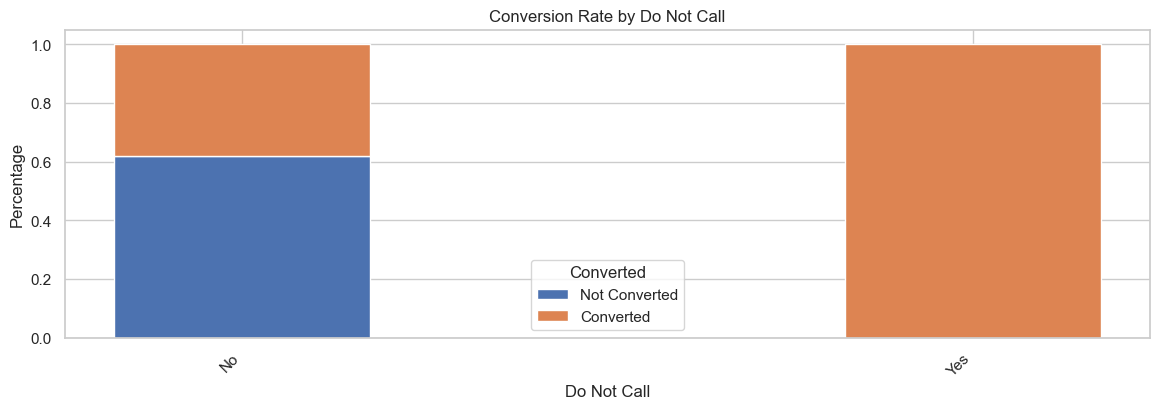

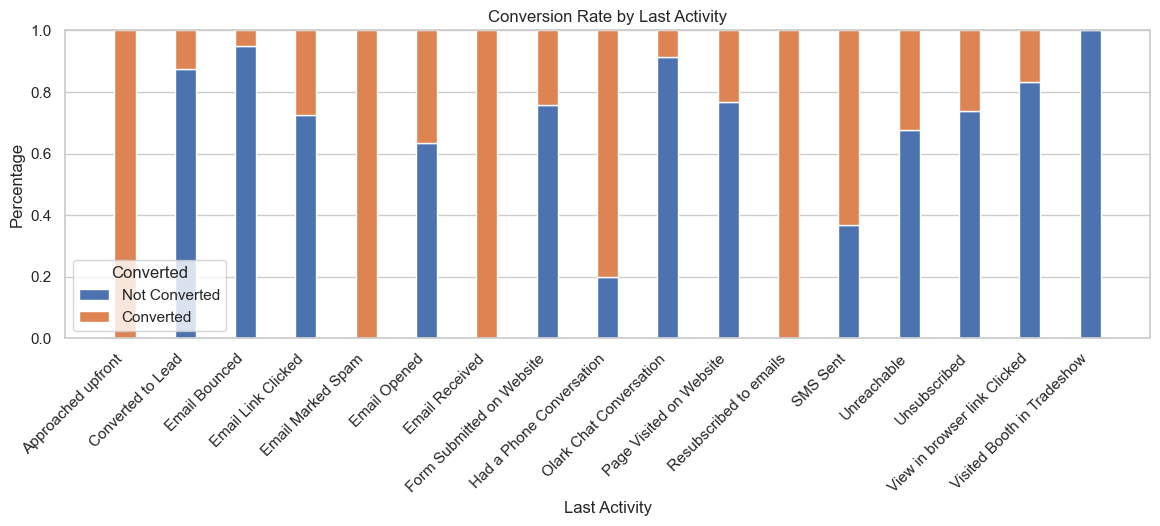

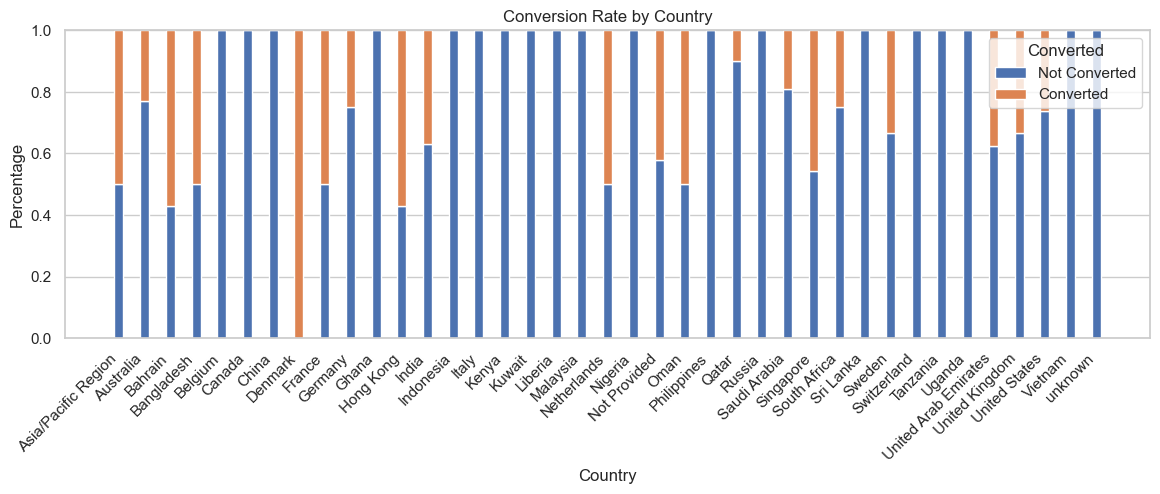

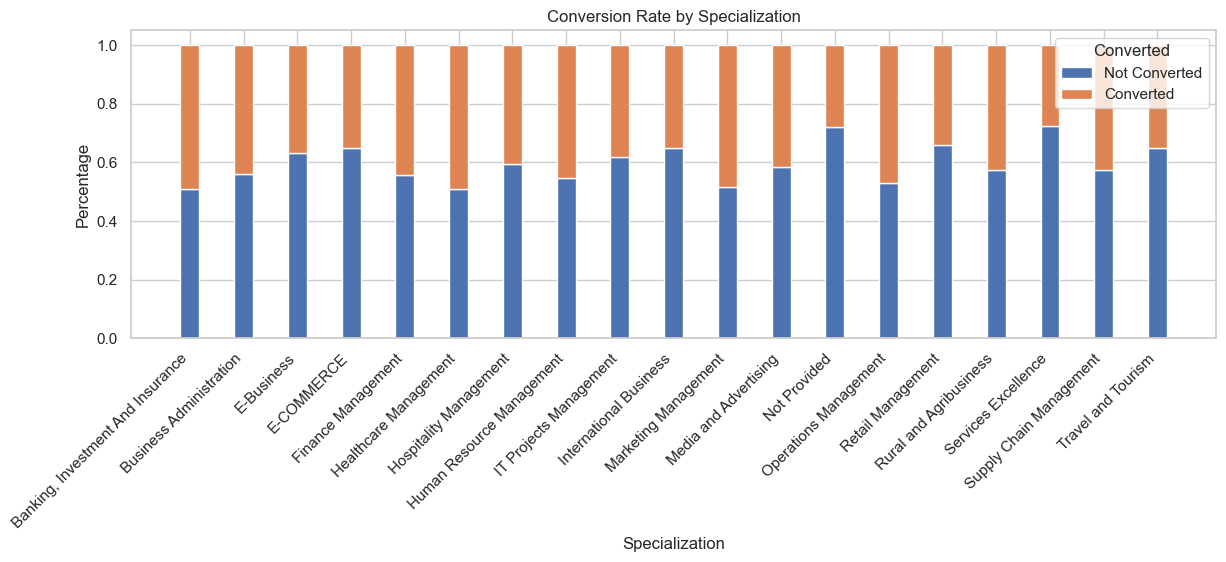

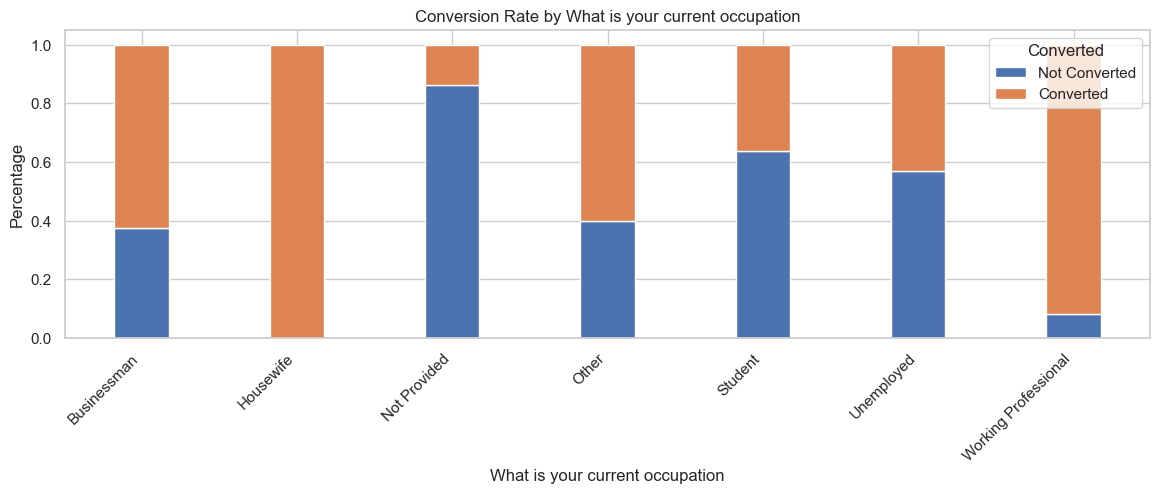

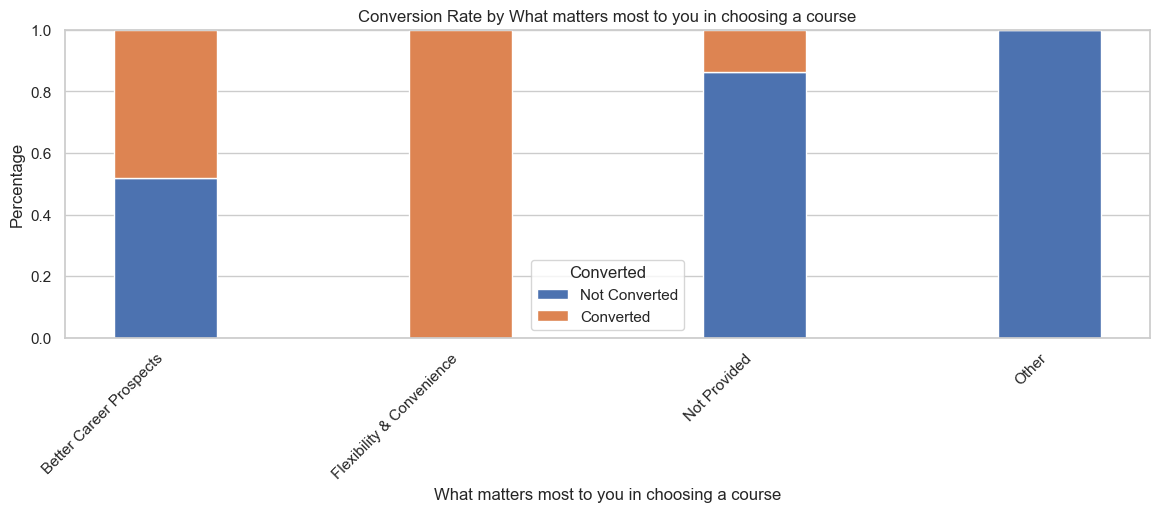

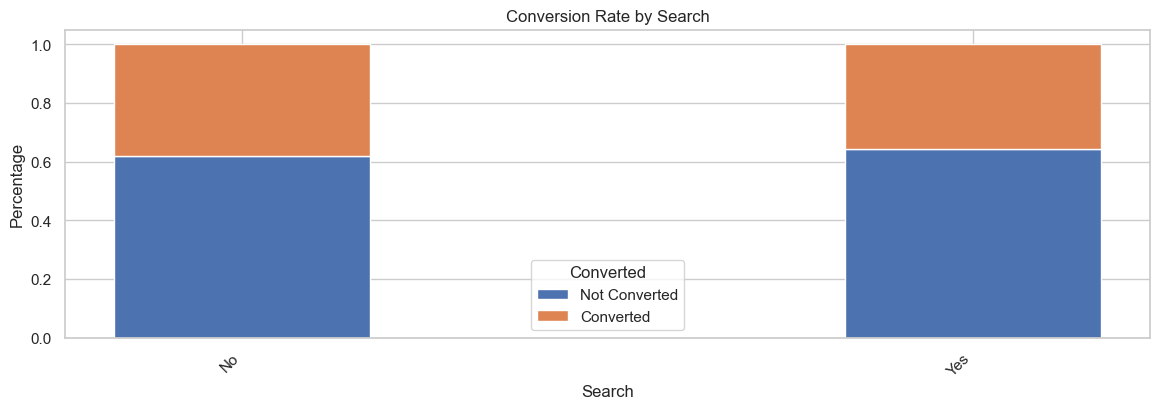

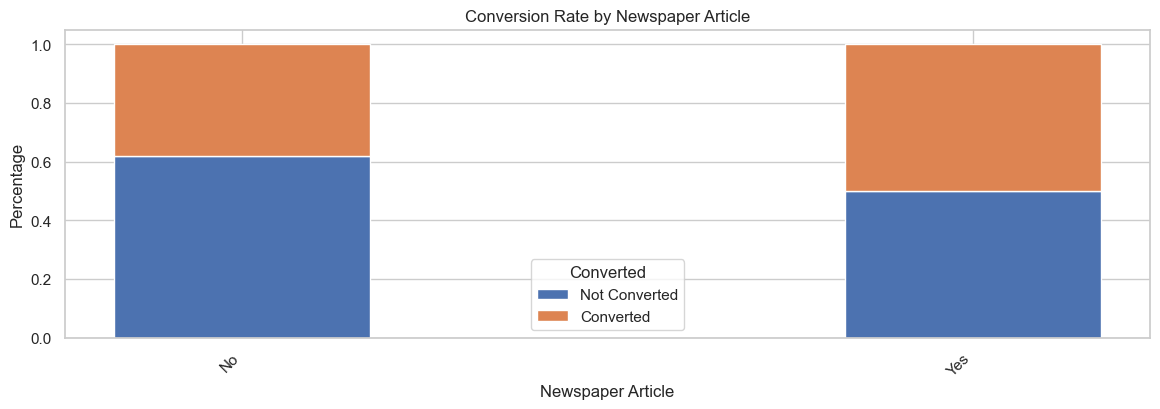

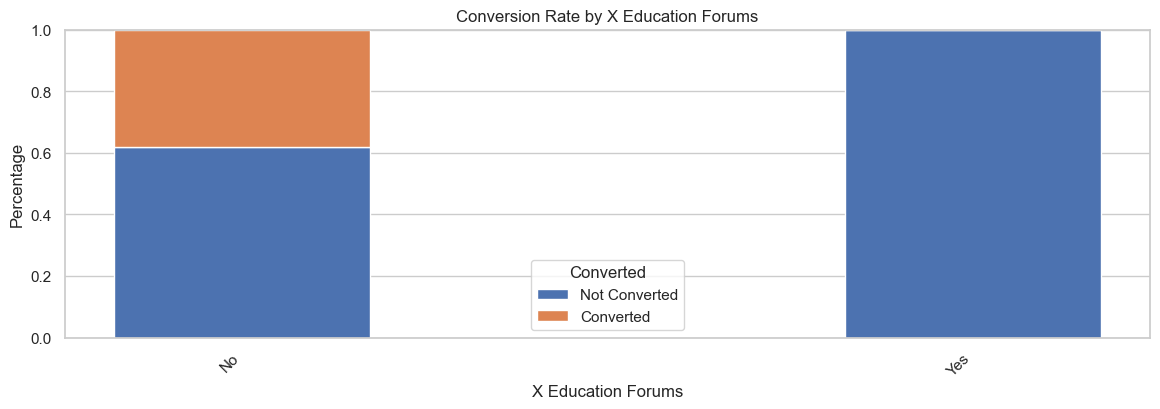

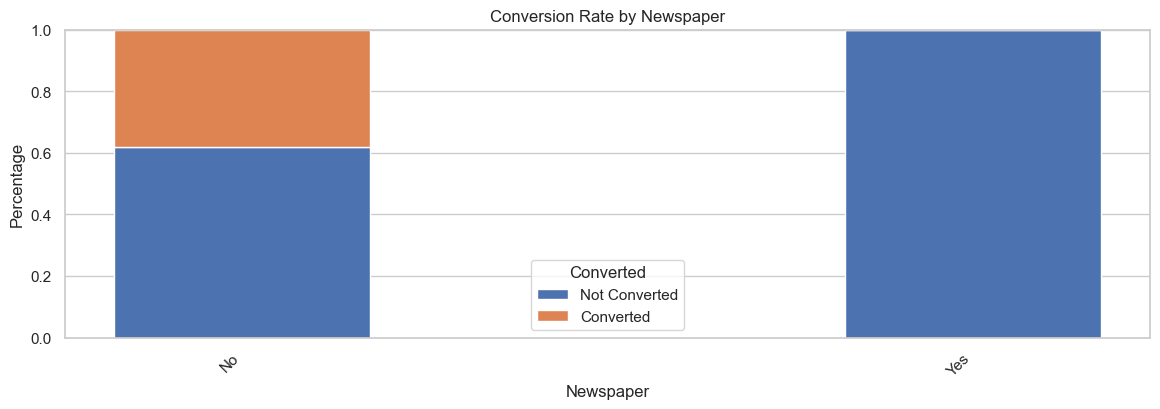

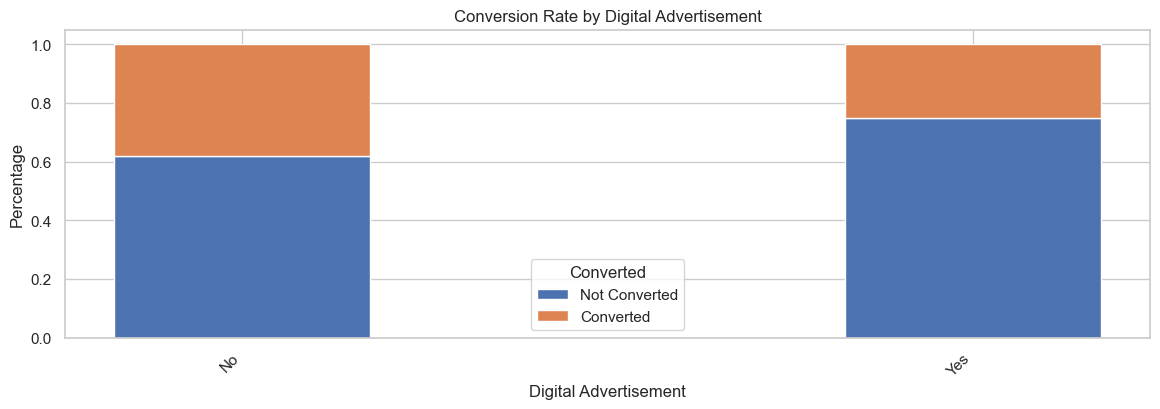

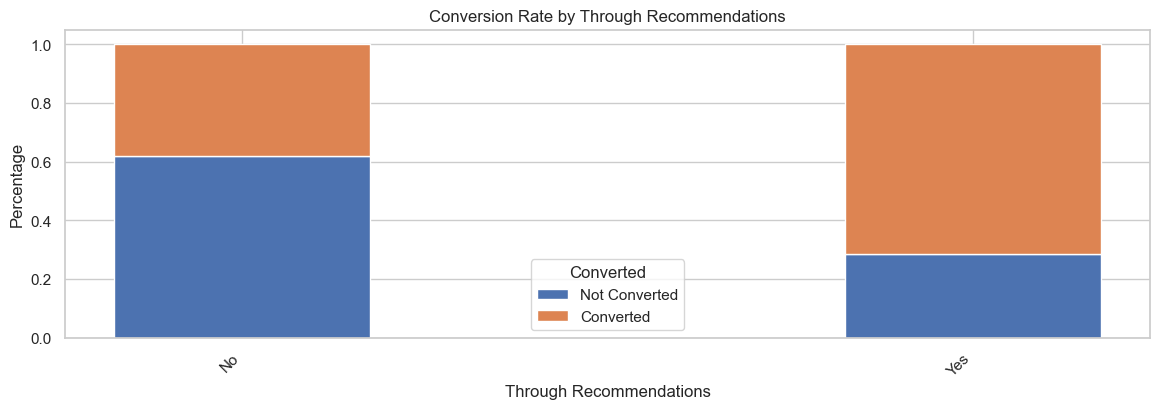

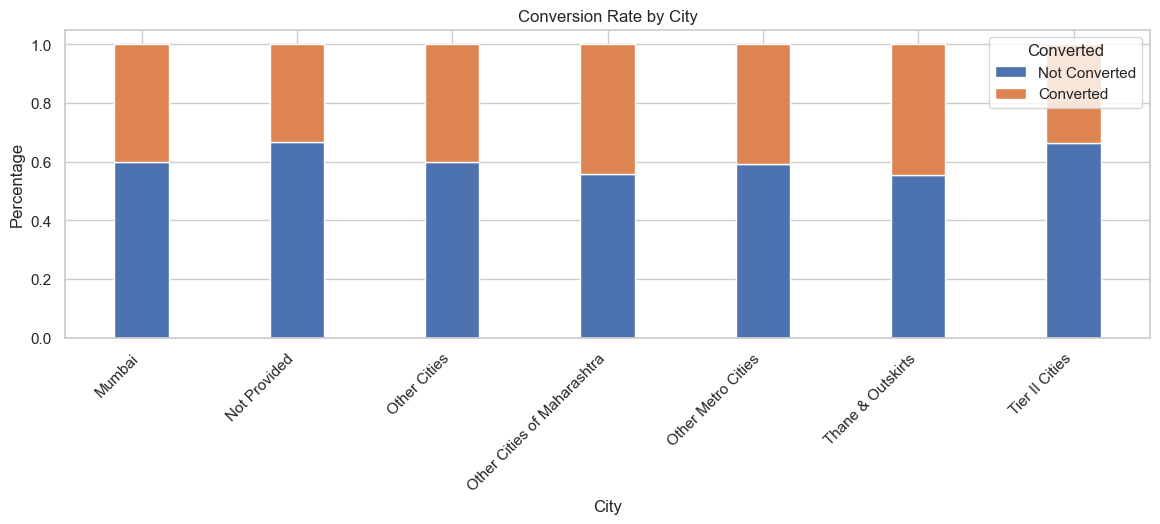

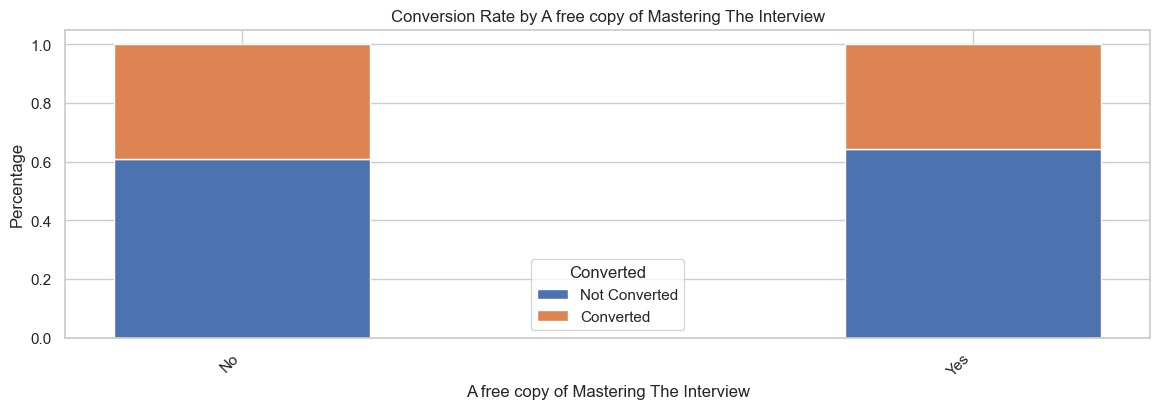

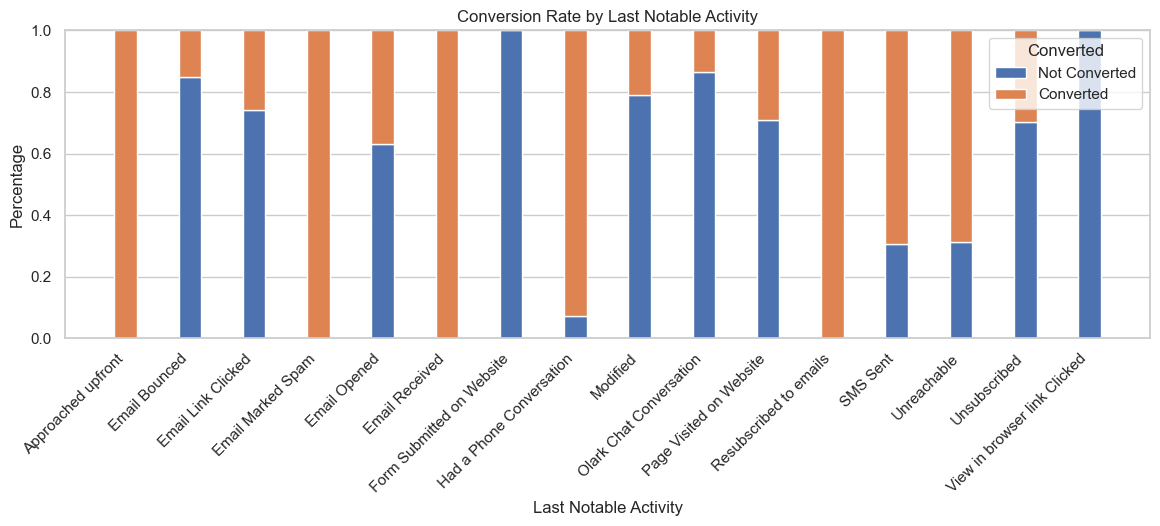

In [35]:
# Stacked bar chart for a categorical variable
for col in List_cat_cols:
    # Create a crosstab of counts
    categorical_table = pd.crosstab(data[col], data['Converted'])
    
    # Calculate the percentage of each category
    categorical_table_pct = categorical_table.div(categorical_table.sum(1), axis=0)
    
    # Create a stacked bar chart
    fig, ax = plt.subplots(figsize=(14, 4))
    
    # Plot each part of the stack
    bar_width = 0.35  # Set the width of a bar
    
    categories = categorical_table_pct.index
    converted_no = categorical_table_pct[0].values
    converted_yes = categorical_table_pct[1].values
    
    # Plotting each stack
    ax.bar(categories, converted_no, width=bar_width, label='Not Converted')
    ax.bar(categories, converted_yes, width=bar_width, bottom=converted_no, label='Converted')

    # Adding titles and labels
    ax.set_title(f'Conversion Rate by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.legend(title='Converted')
    
    # Improve the x-axis labels visibility
    plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility if needed

    plt.show()


### Feature Engineering

In [36]:
#Interaction between TotalVisits and Total Time Spent on Website
data['Interaction_Visits_Time'] = data['TotalVisits'] * data['Total Time Spent on Website']

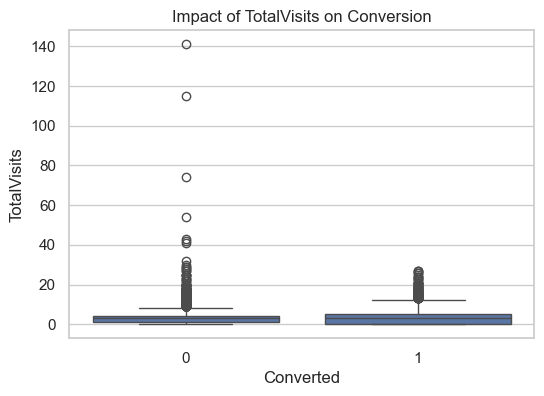

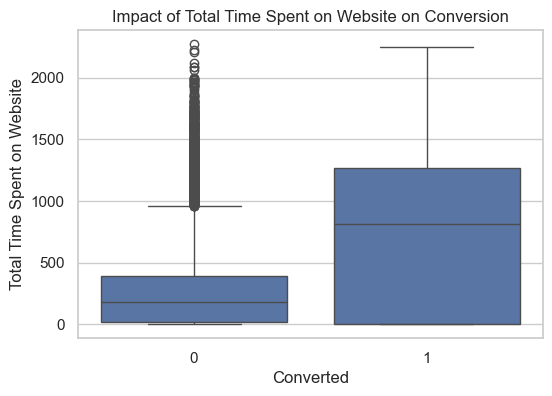

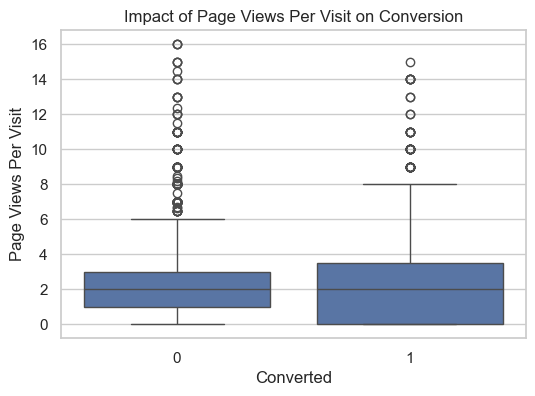

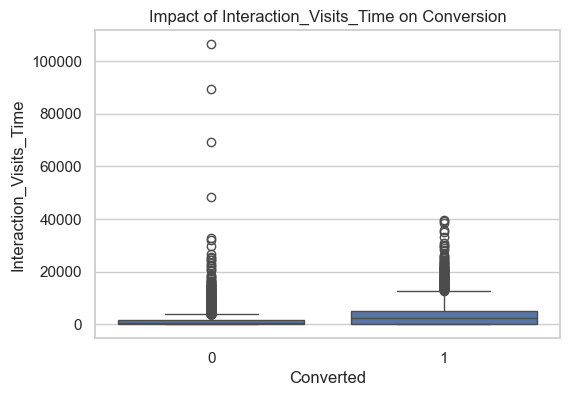

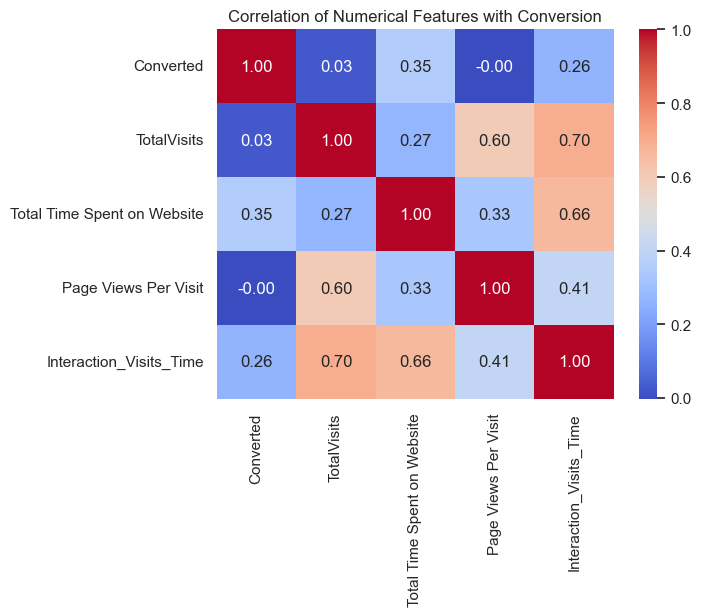

In [37]:
numerical_cols.append('Interaction_Visits_Time')
plot_numerical(numerical_cols, data)

#### Inference of Numerical Data
    
     'TotalVisits' - Has negligible corelation with Converted (0.03)
     'Total Time Spent on Website' has the most corelation with Converted (0.36) among Numerical Variable
     'Page Views Per Visit' - Has no corelation with Converted (-0.00)
     'Interaction_Visits_Time' - Has lower co-relation with Converted compared to 'Total Time Spent on Website' and 
         doesnt serve any added purpose as initialy expected.

In [38]:
## Dropping newly created column 'Interaction_Visits_Time'
data.drop(['Interaction_Visits_Time'], axis=1, inplace=True)

##### Create Dummy Variable for Categorical columns

In [39]:
# Create dummy variables
dummies = pd.get_dummies(data[List_cat_cols], drop_first=True)  # drop_first=True to avoid multicollinearity
data = pd.concat([data.drop(List_cat_cols, axis=1), dummies], axis=1)

In [40]:
data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [41]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=141)

In [42]:
#Removing Columns / Feature with "Not Provided" added earlier to prevent model dependency on unknown / undefined values\
# Identifying Features that have Not Provided
not_provided_cols = [col for col in data.columns if 'Not Provided' in col]

print("Columns to be removed:", not_provided_cols)


Columns to be removed: ['Lead Source_Not Provided', 'Country_Not Provided', 'Specialization_Not Provided', 'What is your current occupation_Not Provided', 'What matters most to you in choosing a course_Not Provided', 'City_Not Provided']


In [43]:
data = data.drop(columns=not_provided_cols)


In [44]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=135)

#### Data Splitting (Test - Train)

In [45]:
# Prepare your features (X) and target (y)
X = data.drop('Converted', axis=1)  # Assuming 'Converted' is the target variable
y = data['Converted']

In [46]:
X.head()

,Prospect ID,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,2.0,1532,2.0,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,1.0,305,1.0,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,2.0,1428,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [47]:
### Dropping 'Prospect ID','Lead Number' from X as these are record numbers and are not required for model
X.drop(['Prospect ID','Lead Number'],axis=1,inplace = True)

In [48]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [49]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Split the data into training and testing sets, with 30% for Test and 70% for Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### Scalling the numerical columns

In [51]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [52]:
# Fit the scaler on the training data and transform it for numerical columns
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [53]:
X_train_scaled = X_train

## Model Building

In [54]:
# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [55]:
# Runnin RFE model with 20 Variable
rfe = RFE(model, n_features_to_select=20)  
rfe = rfe.fit(X_train_scaled, y_train)


In [56]:
# Checking which features were selected
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [57]:
# Selecting the features given by RFE
model_col = X_train_scaled.columns[rfe.support_]
col_indices = [X_train_scaled.columns.get_loc(c) for c in model_col]

In [58]:
X_train_scaled_selected = X_train_scaled.iloc[:, col_indices]


In [59]:
# Convert to DataFrame
X_train_scaled_selected = pd.DataFrame(X_train_scaled_selected, columns=[X_train.columns[i] for i in range(len(X_train.columns)) if rfe.support_[i]])


In [60]:
# My change
np.asarray(X_train_scaled_selected).dtype

dtype('O')

In [61]:
# My change in GLM function: X_train_sm -> X_train_sm.astype(float)
# Resetting indices to make sure they align
X_train_scaled_selected = X_train_scaled_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train_sm = sm.add_constant(X_train_scaled_selected)
logm1 = sm.GLM(y_train, X_train_sm.astype(float), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6370
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.2
Date:                Sun, 19 Jan 2025   Deviance:                       5122.4
Time:                        20:10:44   Pearson chi2:                 6.21e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4121
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0416      0.108    -18.879      0.000      -2.254      -1.830
TotalVisits                                              2.2728      1.252      1.815      0.070      -0.182       4.727
Total Time Spent on Website                              4.6314      0.169     27.446      0.000       4.301       4.962
Lead Origin_Lead Add Form                                2.3777      0.224     10.615      0.000       1.939       2.817
Lead Source_Direct Traffic                              -1.6963      0.123    -13.761      0.000      -1.938      -1.455
Lead Source_Google                                      -1.2050      0.117    -10.312      0.000      -1.434      -0.976
Lead Source_Organic Search                              -1.3118      0.141     -9.289      0.000      -1.589      -1.035
Lead Source_Referral Sites                              -1.5298      0.337     -4.543      0.000      -2.190      -0.870
Lead Source_Welingak Website                            22.4092   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
Do Not Email_Yes                                        -1.5824      0.170     -9.307      0.000      -1.916      -1.249
Last Activity_Converted to Lead                         -1.0022      0.219     -4.582      0.000      -1.431      -0.574
Last Activity_Had a Phone Conversation                   1.0833      0.807      1.343      0.179      -0.498       2.665
Last Activity_Olark Chat Conversation                   -1.2441      0.163     -7.644      0.000      -1.563      -0.925
Last Activity_SMS Sent                                   1.3094      0.077     17.072      0.000       1.159       1.460
What is your current occupation_Housewife               25.1847   5.43e+04      0.000      1.000   -1.06e+05    1.06e+05
What is your current occupation_Other                    2.3758      0.670      3.547      0.000       1.063       3.689
What is your current occupation_Student                  1.2865      0.229      5.609      0.000       0.837       1.736
What is your current occupation_Unemployed               1.2668      0.089     14.256      0.000       1.093       1.441
What is your current occupation_Working Professional     4.0494      0.220     18.378      0.000       3.618       4.481
Last Notable Activity_Had a Phone Conversation           2.0027      1.426      1.404      0.160      -0.792       4.798
Last Notable Activity_Unreachable                        1.8395      0.516      3.564      0.000       0.828       2.851
========================================================================================================================
"""

In [62]:
# My change
X_train_sm = X_train_sm.astype(dtype=float)

In [63]:
# Create VIF dataframe for all the variables present
pd.set_option('display.max_colwidth', None)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.95
5,Lead Source_Google,2.50
4,Lead Source_Direct Traffic,2.47
11,Last Activity_Had a Phone Conversation,2.11
19,Last Notable Activity_Had a Phone Conversation,2.10
6,Lead Source_Organic Search,1.97
3,Lead Origin_Lead Add Form,1.73
17,What is your current occupation_Unemployed,1.33
2,Total Time Spent on Website,1.33
18,What is your current occupation_Working Professional,1.33


### Analyzing the Results

    For 'What is your current occupation_Housewife', the VIF value is fine but the p-values are 99%. 
    Removing the same from the model and retesting the model



In [64]:
X_train_sm.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)


In [65]:
#Refit the model
X_train_sm = sm.add_constant(X_train_sm)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6370
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.9
Date:                Sun, 19 Jan 2025   Deviance:                       5131.7
Time:                        20:10:45   Pearson chi2:                 6.23e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4112
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0263      0.108    -18.818      0.000      -2.237      -1.815
TotalVisits                                              2.2387      1.255      1.783      0.075      -0.222       4.699
Total Time Spent on Website                              4.6389      0.169     27.512      0.000       4.308       4.969
Lead Origin_Lead Add Form                                2.4161      0.224     10.785      0.000       1.977       2.855
Lead Source_Direct Traffic                              -1.6907      0.123    -13.729      0.000      -1.932      -1.449
Lead Source_Google                                      -1.2029      0.117    -10.300      0.000      -1.432      -0.974
Lead Source_Organic Search                              -1.3051      0.141     -9.251      0.000      -1.582      -1.029
Lead Source_Referral Sites                              -1.5288      0.337     -4.543      0.000      -2.188      -0.869
Lead Source_Welingak Website                            22.3773   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
Do Not Email_Yes                                        -1.5877      0.170     -9.333      0.000      -1.921      -1.254
Last Activity_Converted to Lead                         -1.0093      0.219     -4.615      0.000      -1.438      -0.581
Last Activity_Had a Phone Conversation                   1.0745      0.807      1.331      0.183      -0.507       2.656
Last Activity_Olark Chat Conversation                   -1.2494      0.163     -7.679      0.000      -1.568      -0.931
Last Activity_SMS Sent                                   1.3030      0.077     17.004      0.000       1.153       1.453
What is your current occupation_Other                    2.3554      0.670      3.516      0.000       1.042       3.668
What is your current occupation_Student                  1.2663      0.229      5.522      0.000       0.817       1.716
What is your current occupation_Unemployed               1.2489      0.088     14.139      0.000       1.076       1.422
What is your current occupation_Working Professional     4.0312      0.220     18.312      0.000       3.600       4.463
Last Notable Activity_Had a Phone Conversation           2.0047      1.425      1.406      0.160      -0.789       4.799
Last Notable Activity_Unreachable                        1.8299      0.516      3.548      0.000       0.819       2.841
========================================================================================================================
"""

In [66]:
# Create again VIF dataframe for all the variables present
pd.set_option('display.max_colwidth', None)
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.94
5,Lead Source_Google,2.50
4,Lead Source_Direct Traffic,2.47
11,Last Activity_Had a Phone Conversation,2.11
18,Last Notable Activity_Had a Phone Conversation,2.10
6,Lead Source_Organic Search,1.97
3,Lead Origin_Lead Add Form,1.73
16,What is your current occupation_Unemployed,1.33
2,Total Time Spent on Website,1.33
17,What is your current occupation_Working Professional,1.33


### Analyzing the Results

    The p-values and VIF values are within acceptable range. The VIF for the constant alone is greater than 5 and can be ignored Since the constant term does not compete with other variables for variance explanation and does not inflate standard errors of other predictors due to multicollinearity, a high VIF value here is not usually a concern 



### Prediction on Training Set

In [67]:
# Predict the probabilities and binary outcomes using the trained model, with a cutoff of 0.5
y_train_pred_prob = res.predict(X_train_sm)  # Ensure to add a constant if the model requires it
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)  # Convert probabilities to 0 or 1


In [68]:
# Basic accuracy and ROC AUC score
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training ROC AUC:", roc_auc_score(y_train, y_train_pred_prob))

# Detailed classification report
print("Classification Report (Training):\n", classification_report(y_train, y_train_pred))

Training Accuracy: 0.814756671899529
Training ROC AUC: 0.8922239460673543
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      3901
           1       0.79      0.71      0.75      2469

    accuracy                           0.81      6370
   macro avg       0.81      0.79      0.80      6370
weighted avg       0.81      0.81      0.81      6370



### Precision and recall tradeoff


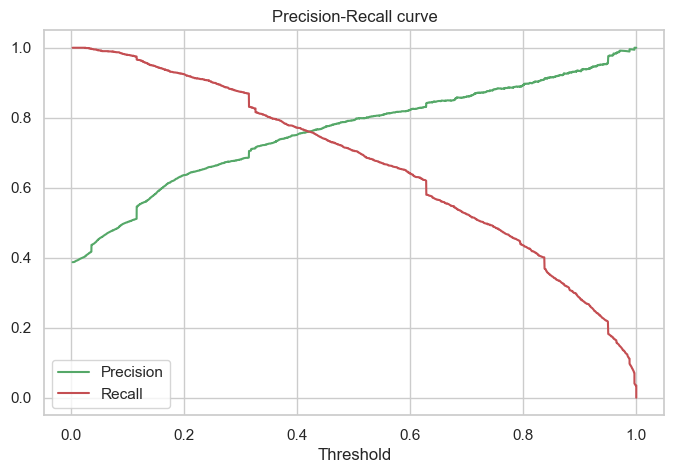

In [69]:
precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred_prob)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], "g-", label='Precision')
plt.plot(thresholds, recall[:-1], "r-", label='Recall')
plt.title('Precision-Recall curve')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### ROC Curve

In [70]:
# Calculate the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
roc_auc = roc_auc_score(y_train, y_train_pred_prob)

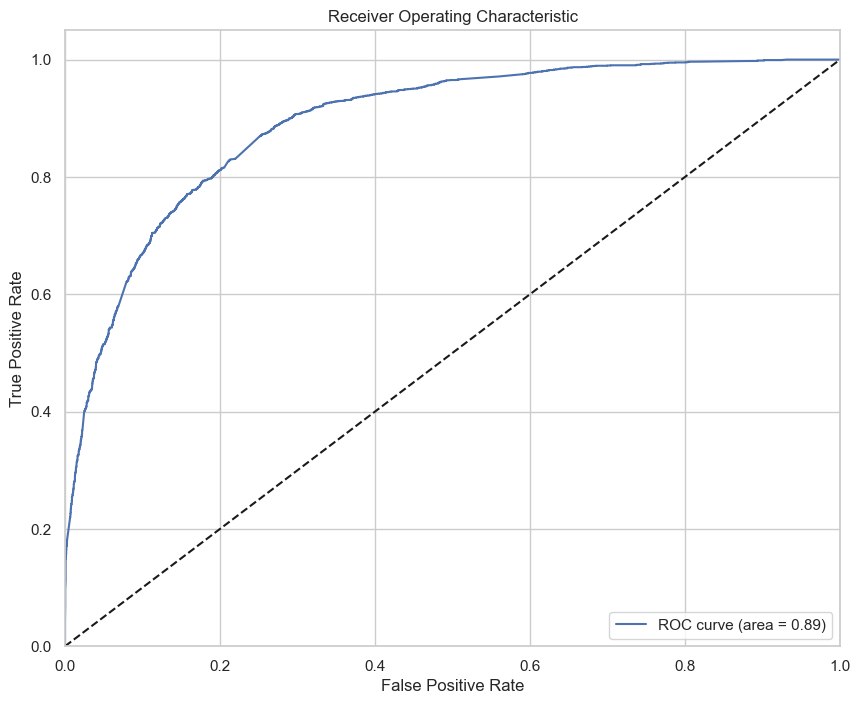

In [71]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##### The area under the ROC curve is 0.89 which is very good

## Analysis of Model Performance Metrics (Test):

#### Training Accuracy (0.815 or 81.5%):

This is a strong accuracy rate, indicating a high level of correctness across predictions. It suggests that the model is effectively capturing the underlying patterns in the data.

#### Training ROC AUC (0.889 or 88.9%):

The ROC AUC score is excellent, reflecting the model's strong discriminative ability between the converted and non-converted classes. A score close to 1.0 is indicative of a model with excellent performance in distinguishing between the positive and negative classes.

#### Classification Report:

###### Precision:
For Non-Converted (0): 0.83 indicates that when the model predicts a lead will not convert, it is correct about 83% of the time.
For Converted (1): 0.79 suggests that when the model predicts a lead will convert, it is correct about 79% of the time.

###### Recall:
For Non-Converted (0): 0.88 shows that the model correctly identifies 88% of all actual non-conversions.
For Converted (1): 0.71 means the model identifies 71% of all actual conversions.

###### F1-Score:
For Non-Converted (0): 0.86 indicates a very balanced precision and recall for predicting non-conversions.
For Converted (1): 0.75 shows good balance but suggests room for improvement, particularly in boosting recall without sacrificing precision.

#### Implications:

High overall accuracy and excellent ROC AUC score demonstrate the model’s robust predictive capabilities.
Good precision for both classes means that the model is reliable in its positive predictions which is a requirement for this business case.

## Prediction on Test set

In [72]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [73]:
x_col=list(X_train_sm.columns)
x_col.remove('const')

In [74]:
X_test_selected = X_test[x_col]

In [75]:
X_test_sm = sm.add_constant(X_test_selected)

In [76]:
# My change
X_test_sm = X_test_sm.astype(dtype=float)

In [77]:
# Predict probabilities
y_test_pred_prob = res.predict(X_test_sm)

# Convert probabilities to binary outcomes using a threshold of 0.5
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

In [87]:
y_test_pred_prob

5578    0.180818
8112    0.996744
6737    0.949869
4337    0.834792
6671    0.118322
          ...   
87      0.031563
5835    0.134524
6150    0.349764
2347    0.900500
3090    0.974780
Length: 2730, dtype: float64

In [78]:
# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.8157509157509157
Confusion Matrix:
 [[1540  200]
 [ 303  687]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1740
           1       0.77      0.69      0.73       990

    accuracy                           0.82      2730
   macro avg       0.81      0.79      0.80      2730
weighted avg       0.81      0.82      0.81      2730



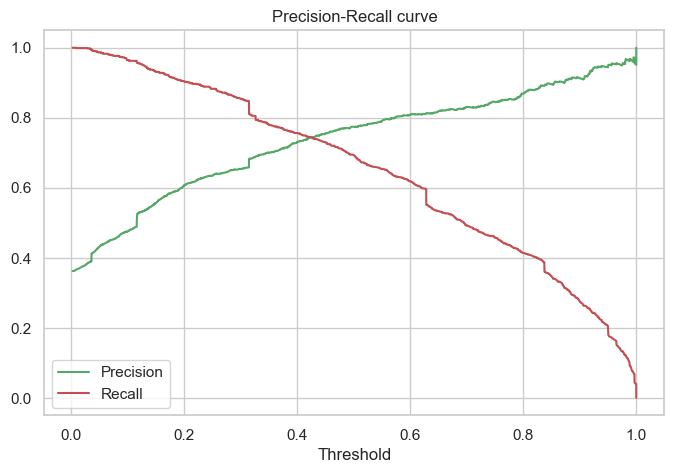

In [79]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], "g-", label='Precision')
plt.plot(thresholds, recall[:-1], "r-", label='Recall')
plt.title('Precision-Recall curve')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Test Data Performance Analysis:

##### Accuracy (81.85%):
The overall accuracy is about 81.85%, which is quite high, indicating that the model correctly predicts the outcome (either converted or not converted) for a significant majority of the cases.

##### Confusion Matrix:

    True Negatives (TN = 1507): The model correctly predicted 'not converted' 1507 times.
    False Positives (FP = 194): The model incorrectly predicted 'converted' 194 times when it was actually 'not converted'.
    False Negatives (FN = 309): The model incorrectly predicted 'not converted' 309 times when it was actually 'converted'.
    True Positives (TP = 762): The model correctly predicted 'converted' 762 times.
    This matrix suggests the model is slightly better at identifying non-conversions than conversions.

##### Precision, Recall, and F1-Score:

    Precision for Class 0 (Non-Converted): 0.83 indicates that when the model predicts non-conversion, it is correct about 83% of the time.

    Recall for Class 0 (Non-Converted): 0.89 shows that the model is able to identify 89% of all actual non-conversions.

    F1-Score for Class 0 (Non-Converted): 0.86 is a measure of the test's accuracy that considers both the precision and the recall. This is fairly high.

    Precision for Class 1 (Converted): 0.80 indicates that when the model predicts conversion, it is correct about 80% of the time.

    Recall for Class 1 (Converted): 0.71 demonstrates that the model identifies about 71% of all actual conversions.

    F1-Score for Class 1 (Converted): 0.75 suggests a good balance between precision and recall for predicting conversions but highlights some room for improvement, particularly in improving recall without significantly sacrificing precision.

In [85]:
# Get the coefficients from the model
coef_table = res.summary2().tables[1]
coef_table.sort_values(by='Coef.', key=lambda x: abs(x), ascending=False)

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Lead Source_Welingak Website,22.377274,13124.295641,0.001705,9.986396e-01,-25700.769505,25745.524053
Total Time Spent on Website,4.638858,0.168614,27.511764,1.269770e-166,4.308382,4.969335
What is your current occupation_Working Professional,4.031174,0.220143,18.311655,6.680761e-75,3.599703,4.462645
Lead Origin_Lead Add Form,2.416130,0.224024,10.785116,4.047317e-27,1.977050,2.855210
What is your current occupation_Other,2.355383,0.669855,3.516257,4.376765e-04,1.042491,3.668275
TotalVisits,2.238658,1.255324,1.783331,7.453243e-02,-0.221732,4.699048
const,-2.026264,0.107675,-18.818329,5.344330e-79,-2.237303,-1.815225
Last Notable Activity_Had a Phone Conversation,2.004727,1.425443,1.406389,1.596086e-01,-0.789089,4.798544
Last Notable Activity_Unreachable,1.829868,0.515695,3.548349,3.876539e-04,0.819123,2.840612
Lead Source_Direct Traffic,-1.690740,0.123147,-13.729493,6.760494e-43,-1.932103,-1.449377


In [86]:
# Sort the coefficients by their absolute values in descending order
sorted_coef_table = coef_table.sort_values(by='Coef.', key=lambda x: abs(x), ascending=False)
pd.set_option('display.width', 120)
print(sorted_coef_table)

                                                          Coef.      Std.Err.          z          P>|z|        [0.025  \
Lead Source_Welingak Website                          22.377274  13124.295641   0.001705   9.986396e-01 -25700.769505   
Total Time Spent on Website                            4.638858      0.168614  27.511764  1.269770e-166      4.308382   
What is your current occupation_Working Professional   4.031174      0.220143  18.311655   6.680761e-75      3.599703   
Lead Origin_Lead Add Form                              2.416130      0.224024  10.785116   4.047317e-27      1.977050   
What is your current occupation_Other                  2.355383      0.669855   3.516257   4.376765e-04      1.042491   
TotalVisits                                            2.238658      1.255324   1.783331   7.453243e-02     -0.221732   
const                                                 -2.026264      0.107675 -18.818329   5.344330e-79     -2.237303   
Last Notable Activity_Had a Phon

In [93]:
lead_scores_train = round(y_train_pred_prob * 100,2)
lead_scores_train

0       78.23
1        8.89
2        1.44
3        3.64
4       34.58
        ...  
6365     9.13
6366    39.83
6367    11.24
6368     5.73
6369    25.36
Length: 6370, dtype: float64

In [94]:
#Create lead_scores_test_df to hold lead score data for test set
lead_scores_train_df = pd.DataFrame(lead_scores_train, columns=['Lead Score'])

# Add columns from 'data' DataFrame based on the index
# lead_scores_train_df['Prospect ID'] = data.loc[lead_scores_train.index, 'Prospect ID']
# lead_scores_train_df['Lead Number'] = data.loc[lead_scores_train.index, 'Lead Number']

lead_scores_train_df = lead_scores_train_df.sort_values(by='Lead Score', ascending=False)


# Now, 'lead_scores_df' is a DataFrame that includes the lead scores, prospect IDs, and lead numbers
lead_scores_train_df

,Lead Score
3761,100.00
2745,100.00
901,100.00
4184,100.00
3642,100.00
...,...
5405,0.53
5166,0.48
109,0.46
3304,0.41


In [92]:
lead_scores_test = round(y_test_pred_prob * 100,2)
lead_scores_test

5578    18.08
8112    99.67
6737    94.99
4337    83.48
6671    11.83
        ...  
87       3.16
5835    13.45
6150    34.98
2347    90.05
3090    97.48
Length: 2730, dtype: float64

In [89]:
#Create lead_scores_test_df to hold lead score data for test set
lead_scores_test_df = pd.DataFrame(lead_scores_test, columns=['Lead Score'])

# Add columns from 'data' DataFrame based on the index
lead_scores_test_df['Prospect ID'] = data.loc[lead_scores_test.index, 'Prospect ID']
lead_scores_test_df['Lead Number'] = data.loc[lead_scores_test.index, 'Lead Number']

lead_scores_test_df = lead_scores_test_df.sort_values(by='Lead Score', ascending=False)


# Now, 'lead_scores_df' is a DataFrame that includes the lead scores, prospect IDs, and lead numbers
lead_scores_test_df

,Lead Score,Prospect ID,Lead Number
6423,100.00,c359328c-eb43-4000-93c0-1a518653d39e,600701
2378,100.00,8ff353ab-1207-4608-a8cc-8172ea7c12eb,636860
607,100.00,ea76c5cd-3498-4f52-93d0-8d8e212836b1,654136
2085,100.00,a602f8c0-f90e-43c7-bbae-77cad039c1f7,639518
2688,100.00,d0a8a0aa-fabd-410a-ad18-e88d6d8ab56e,633904
...,...,...,...
5521,0.59,bf488243-9f62-4a11-80ea-218e3a29430b,607548
6804,0.58,560f8659-0a48-4e49-a540-aff11e4f94a0,597599
573,0.58,51edf783-a7d4-454a-821a-631a9017a278,654319
6628,0.54,60f52b48-f04d-47f4-82c7-24d3bb0848eb,598940


# Conclusion

Our analysis through logistic regression has identified key variables that significantly influence the conversion of leads at X Education. By assigning a lead score to each potential customer, our model effectively prioritizes leads who are most likely to convert, aligning with the CEO's goal of achieving an 80% conversion rate.

## Key Findings:
Total Time Spent on Website and Total Visits emerged as the top predictors, indicating that engaged users are more likely to convert.
Occupational status, particularly Working Professionals, shows a higher likelihood of conversion, suggesting targeted campaigns for this demographic could yield higher conversions.
Lead Source, with platforms like the Welingak Website and direct engagements through Lead Add Forms, has a substantial impact, underscoring the value of strategic partnerships and focused marketing efforts.